# Rpc_Reso_Fit
Gaussian classifier




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, May 17, 2021 at 01:37 PM.</small></i>

In [1]:
import os
from math import sqrt, pow, fabs, log, cos, sin, pi, atan, exp
import ROOT as R
R.gROOT.SetStyle("ATLAS")
R.gStyle.SetPalette(1)

pname = "gaus_3D_test"

Welcome to JupyROOT 6.22/07


Helper function to print a matrx(m, n)

In [2]:
def print_matrix(m_cov, md, nd):

  for j in range(md):
    for k in range(nd):
      print("{0} {1}: {2}".format(j, k, R.TMatrixDRow(m_cov, j)[k]))

Plotting
=====================

In [3]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)

nbinsx, xmin, xmax = 60, -3, 3
nbinsy, ymin, ymax = 60, -3, 3
nbinsz, zmin, zmax = 60, -3, 3

Overlay the multi-Gaussian PDF

Helper function for 3D Gaussian

In [4]:
def gaus_3d(x, par):

  if len(x)<3 or len(par)<3: 
    print("[gaus_3d]: requirs 3D data, and 3 parameters")
    return 0

  # 3D Gaussian
  nd = 3

  # Mean
  # x1-x2, x1-x3, x2-x3
  mean = [par[0], par[1], par[2]]

  # Covariance matrix 
  #  sig1^2+sig2^2, sig1^2, sig2^2
  #  sig1^2, sig1^2+sig3^2, sig3^2
  #  sig2^2, sig3^2, sig2^2+sig3^2
  cov = R.TMatrixD(nd, nd)
  R.TMatrixDRow(cov, 0)[0] = pow(par[3], 2) + pow(par[4], 2)
  R.TMatrixDRow(cov, 0)[1] = pow(par[3], 2)
  R.TMatrixDRow(cov, 0)[2] = pow(par[4], 2)
  R.TMatrixDRow(cov, 1)[0] = pow(par[3], 2)
  R.TMatrixDRow(cov, 1)[1] = pow(par[3], 2) + pow(par[5], 2)
  R.TMatrixDRow(cov, 1)[2] = pow(par[5], 2)
  R.TMatrixDRow(cov, 2)[0] = pow(par[4], 2)
  R.TMatrixDRow(cov, 2)[1] = pow(par[5], 2)
  R.TMatrixDRow(cov, 2)[2] = pow(par[4], 2) + pow(par[5], 2)

  # Build the multi-Gaussian
  m_x = R.TMatrixD(nd, 1)
  for i in range(nd):
    R.TMatrixDRow(m_x, i)[0] = x[i] - mean[i]

  m_x_t = R.TMatrixD(m_x)
  m_x_t.T()

  cov_d = 0
  icov = R.TMatrixD(cov)
  icov.Invert(cov_d)
  cov_d = cov.Determinant()
  icov_d = icov.Determinant()

  r = 0
  # r = (m_x_t * icov) * m_x
  for i in range(nd):
    for j in range(nd):
      r += R.TMatrixDRow(m_x_t, 0)[j] * R.TMatrixDRow(icov, i)[j] * R.TMatrixDRow(m_x, i)[0]

  y = 1./(pow(2*pi, nd/2.) * sqrt(cov_d)) * exp( -0.5* r ) 

  return y

Fit

Info in <TCanvas::Print>: png file gaus_3D_test_1.png has been created


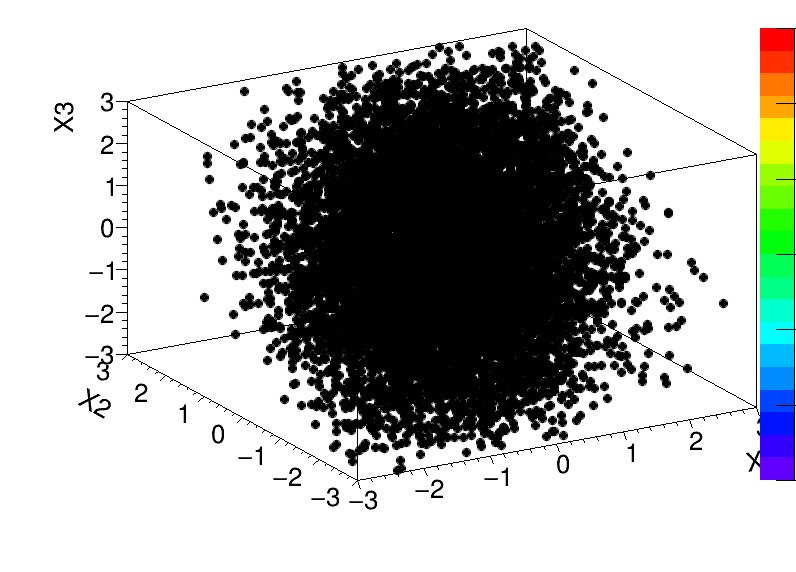

In [5]:
npar = 6 # mean: 3; sigma: 3
g_s = R.TF3("gaus_s", gaus_3d, xmin, xmax, ymin, ymax, zmin, zmax, npar)
g_s.SetParameter(0, 0.)
g_s.SetParameter(1, 0.)
g_s.SetParameter(2, 0.)
g_s.SetParameter(3, 1.)
g_s.SetParameter(4, 0.8)
g_s.SetParameter(5, 1.2)

hname = "3D"
h_s = R.TH3F(hname, hname, nbinsx, xmin, xmax, nbinsy, ymin, ymax, nbinsz, zmin, zmax)
h_s.FillRandom("gaus_s", 10000)  

h_s.GetXaxis().SetRangeUser(-3, 3)
h_s.GetYaxis().SetRangeUser(-3, 3)
h_s.GetZaxis().SetRangeUser(-3, 3)
h_s.GetXaxis().SetTitle("X1")
h_s.GetYaxis().SetTitle("X2")
h_s.GetZaxis().SetTitle("X3")

h_s.Draw("colz")

myc.Draw()
myc.SaveAs("{0}_1.png".format(pname))

Projection

 FCN=9518.19 FROM MIGRAD    STATUS=CONVERGED     279 CALLS         280 TOTAL
                     EDM=9.55093e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.31568e-02   8.36172e-02   3.34269e-03  -2.60834e-04
   2  p1           8.43753e-03   1.03297e-01   3.51605e-03   3.46666e-03
   3  p2          -9.01865e-02   9.91344e-02   3.75889e-03   1.17121e-03
   4  p3          -3.76574e-01   4.27439e-02   1.83922e-03  -2.70899e-03
   5  p4          -2.89182e-01   3.50464e-02   1.48990e-03  -2.36667e-04
   6  p5           4.37824e-01   5.31895e-02   2.25376e-03   1.13797e-03


Info in <TCanvas::Print>: png file gaus_3D_test_1_X.png has been created
Info in <TCanvas::Print>: png file gaus_3D_test_1_Y.png has been created
Info in <TCanvas::Print>: png file gaus_3D_test_1_Z.png has been created
Info in <TCanvas::Print>: png file gaus_3D_test_2.png has been created


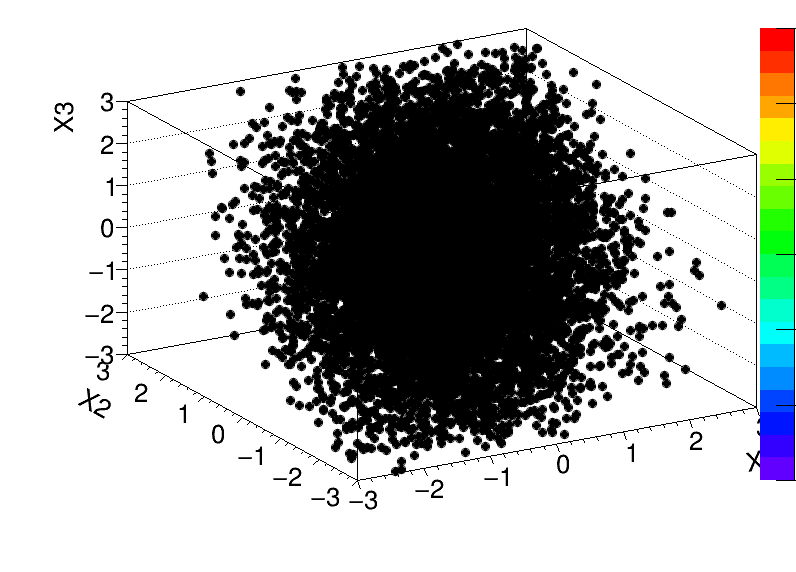

In [6]:
hx = h_s.ProjectionX()
hy = h_s.ProjectionY()
hz = h_s.ProjectionZ()

myc.Clear()
hx.Draw()
myc.Draw()
myc.SaveAs("{0}_1_X.png".format(pname))

hy.Draw()
myc.Draw()
myc.SaveAs("{0}_1_Y.png".format(pname))

hz.Draw()
myc.Draw()
myc.SaveAs("{0}_1_Z.png".format(pname))


myc.Clear()

h_s.Draw()
h_s.Fit("gaus_s")

myc.Draw()
myc.SaveAs("{0}_2.png".format(pname))

Draw all canvases 

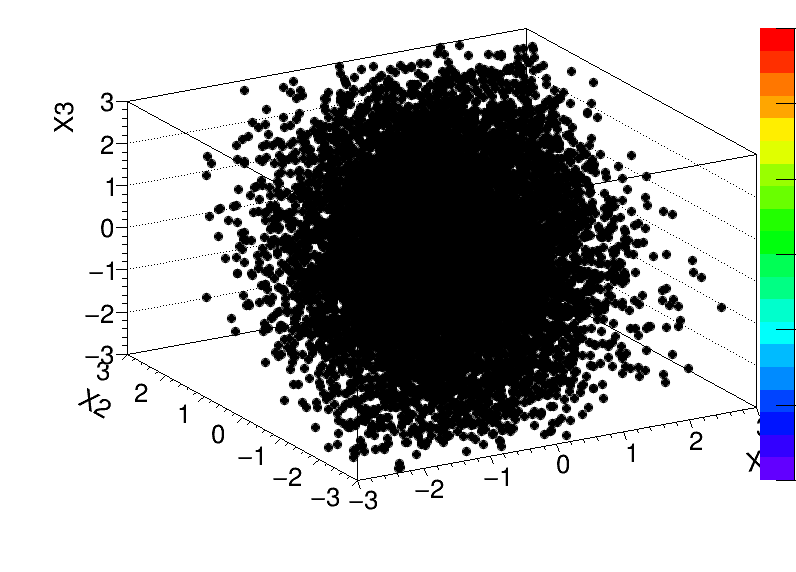

In [7]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()